In [1]:
# make a cloud graph of f(x, y, z) in a 3d plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def custom_gradient(x, x0, y0, z0, rate_x, rate_y, rate_z):
    """
    Generates a custom gradient with a maximum at (x0, y0, z0) and different rates of decrease along x, y, and z.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The x-coordinate of the maximum point.
    y0 (float): The y-coordinate of the maximum point.
    z0 (float): The z-coordinate of the maximum point.
    rate_x (float): The rate of decrease along the x-axis.
    rate_y (float): The rate of decrease along the y-axis.
    rate_z (float): The rate of decrease along the z-axis.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    dx = (x[:, 0] - x0) * rate_x
    dy = (x[:, 1] - y0) * rate_y
    dz = (x[:, 2] - z0) * rate_z
    return np.exp(-(dx**2 + dy**2 + dz**2))

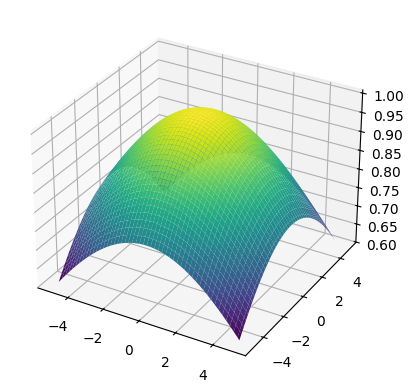

In [11]:
# plot exp function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.exp(-(.01*x**2 + 0.01*y**2))
ax.plot_surface(x, y, z, cmap='viridis')
plt.show()

In [5]:
np.exp(0)

np.float64(1.0)

In [30]:
# function definition

def custom_gradient(x, x0, y0, z0, rate_x, rate_y, rate_z):
    """
    Generates a custom gradient with a maximum at (x0, y0, z0) and different rates of decrease along x, y, and z.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The x-coordinate of the maximum point.
    y0 (float): The y-coordinate of the maximum point.
    z0 (float): The z-coordinate of the maximum point.
    rate_x (float): The rate of decrease along the x-axis.
    rate_y (float): The rate of decrease along the y-axis.
    rate_z (float): The rate of decrease along the z-axis.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    dx = (x[:, 0] - x0) * rate_x
    dy = (x[:, 1] - y0) * rate_y
    dz = (x[:, 2] - z0) * rate_z
    return np.exp(-(dx**2 + dy**2 + dz**2))


soil_x0 = -35000
soil_x1 = 35000
soil_y0 = -35000
soil_y1 = 35000
soil_z0 = 0
soil_z1 = -30

v_min = 0.05 # Minimum value for the concentration for plotting
v_max = 1.65 # Maximum value for the concentration for plotting



# normalizing the function
norm_min = 0
norm_max = 1

def normalize(f):
    f = f - norm_min
    f = f / (norm_max - norm_min)
    return f

# force the function between 0 and 1
def cut(f):
    f = np.maximum(f, 0)
    f = np.minimum(f, 1)
    return f

f = lambda XYZ: custom_gradient(
    XYZ, 
    x0 = 2000,
    y0 = 30000,
    z0 = 0,
    rate_x = 0.00005,
    rate_y = 0.00007,
    rate_z = 0.1
    )

g = lambda XYZ: custom_gradient(
    XYZ, 
    x0 = -20000,
    y0 = 3000,
    z0 = 0,
    rate_x = 0.00002,
    rate_y = 0.00002,
    rate_z = 0.2
    )

carbon_function = lambda XYZ: cut(normalize(f(XYZ) + g(XYZ)))
nitrogen_function = lambda XYZ: (1-carbon_function(XYZ))*cut(normalize(f(XYZ) + g(XYZ)))

fill_elem = lambda XYZ: 1-carbon_function(XYZ)-nitrogen_function(XYZ)

In [34]:
sampling_resolution = 100000
# pick random points in the soil
x = np.random.uniform(soil_x0, soil_x1, sampling_resolution)
y = np.random.uniform(soil_y0, soil_y1, sampling_resolution)
z = np.random.uniform(soil_z0, soil_z1, sampling_resolution)
XYZ = np.column_stack((x, y, z))

carbon = carbon_function(XYZ)
nitrogen = nitrogen_function(XYZ)
fill = fill_elem(XYZ)

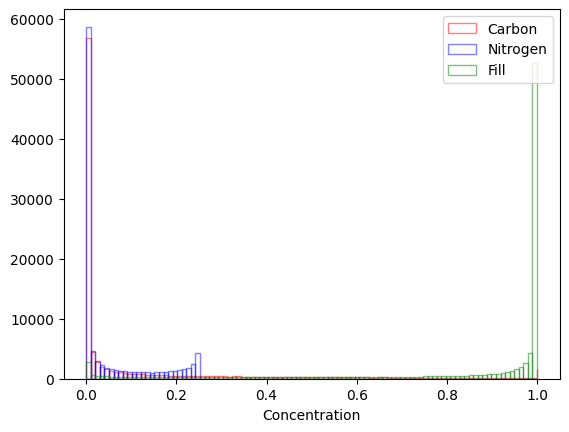

In [38]:
# make histogram for each of the functions
# bins from 0 to 1
plt.figure()
bins = np.linspace(0, 1, 100)
bins = np.concatenate(([-0.0001],bins, [1.0001]))
plt.hist(carbon, bins=bins, alpha=0.5, label='Carbon', fill=False, edgecolor='red')
plt.hist(nitrogen, bins=bins, alpha=0.5, label='Nitrogen', fill=False, edgecolor='blue')
plt.hist(fill, bins=bins, alpha=0.5, label='Fill', fill=False, edgecolor='green')
plt.legend(loc='upper right')
plt.xlabel('Concentration')
plt.show()

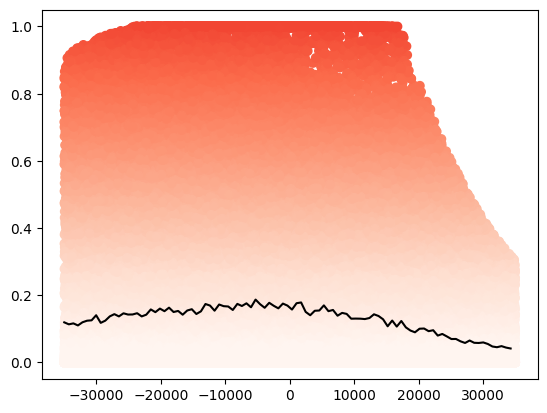

In [43]:
plt.scatter(x, carbon, c=carbon, cmap='Reds', vmin=v_min, vmax=v_max)
# plot average in bins
x_bins = np.linspace(soil_x0, soil_x1, 100)
# get the average of the carbon in each bin
carbon_bins = np.zeros(len(x_bins)-1)
for i in range(len(x_bins)-1):
    mask = np.logical_and(x > x_bins[i], x < x_bins[i+1])
    carbon_bins[i] = np.mean(carbon[mask])
plt.plot(x_bins[:-1], carbon_bins, color='black')


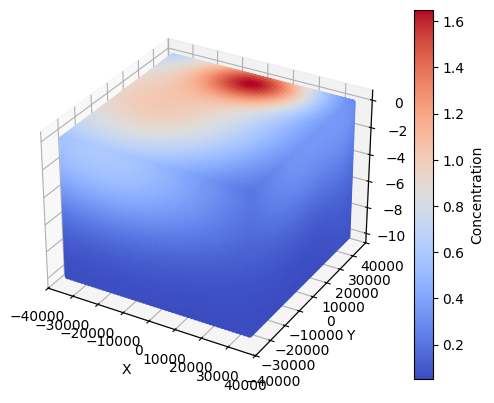

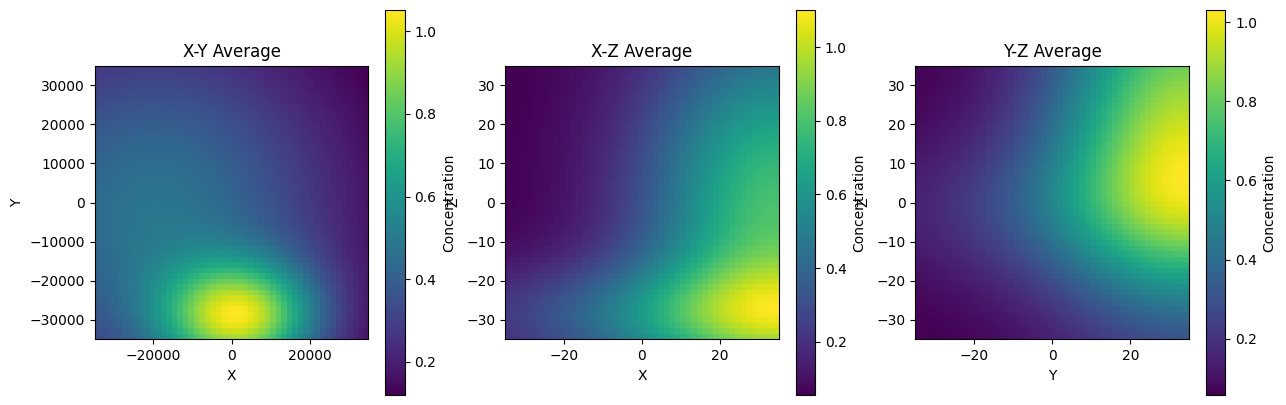

In [10]:
soil_x0 = -35000
soil_x1 = 35000
soil_y0 = -35000
soil_y1 = 35000
soil_z0 = 0
soil_z1 = -30

v_min = 0.05 # Minimum value for the concentration for plotting
v_max = 1.65 # Maximum value for the concentration for plotting

def custom_gradient(x, x0, y0, z0, rate_x, rate_y, rate_z):
    """
    Generates a custom gradient with a maximum at (x0, y0, z0) and different rates of decrease along x, y, and z.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The x-coordinate of the maximum point.
    y0 (float): The y-coordinate of the maximum point.
    z0 (float): The z-coordinate of the maximum point.
    rate_x (float): The rate of decrease along the x-axis.
    rate_y (float): The rate of decrease along the y-axis.
    rate_z (float): The rate of decrease along the z-axis.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    dx = (x[:, 0] - x0) * rate_x
    dy = (x[:, 1] - y0) * rate_y
    dz = (x[:, 2] - z0) * rate_z
    return np.exp(-(dx**2 + dy**2 + dz**2))

# Example usage




# create a grid of x, y, z values
nx = 50
ny = 50
nz = 50
x = np.linspace(-35000, 35000, nx)
y = np.linspace(-35000, 35000, ny)
z = np.linspace(-10, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# calculate the value of f(x, y, z) at each point in the grid
XYZ = np.vstack([X.flatten(), Y.flatten(), Z.flatten()]).T
x0, y0, z0 = 2000, 30000, 0
rate_x, rate_y, rate_z = 0.00005, 0.00007, .1
F = custom_gradient(XYZ, x0, y0, z0, rate_x, rate_y, rate_z)

# x0, y0, z0 = 100000, 0, 0
# rate_x, rate_y, rate_z = 0.02, 0.02, .1
# F = custom_gradient(XYZ, x0, y0, z0, rate_x, rate_y, rate_z)

x0, y0, z0 = -20000, 3000, 0
rate_x, rate_y, rate_z = 0.00002, 0.00002, .2
F = F+custom_gradient(XYZ, x0, y0, z0, rate_x, rate_y, rate_z)


F = (F - np.min(F)) / (np.max(F) - np.min(F)) * (v_max - v_min) + v_min
# F = np.clip(F, v_min, v_max)

# create a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# include a colorbar
cbar = plt.colorbar(ax.scatter(X, Y, Z, c=F, cmap='coolwarm', alpha=1))
cbar.set_label('Concentration')


plt.show()

# graph slices prependicular to the origin
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# x-y slice
ax = axs[0]
ax.set_title('X-Y Average')
_data = F.reshape(50, 50, 50)[:, :, :]
_data = np.average(_data, axis=2)
ax.imshow(_data, extent=[-35000, 35000, -35000, 35000])
ax.set_xlabel('X')
ax.set_ylabel('Y')
# include a colorbar
cbar = plt.colorbar(ax.imshow(_data, extent=[-35000, 35000, -35000, 35000]))
cbar.set_label('Concentration')


# x-z slice
ax = axs[1]
ax.set_title('X-Z Average')
_data = F.reshape(50, 50, 50)[:, :, :]
_data = np.average(_data, axis=1)
ax.imshow(_data, extent=[-35, 35, -35, 35])
ax.set_xlabel('X')
ax.set_ylabel('Z')
# include a colorbar
cbar = plt.colorbar(ax.imshow(_data, extent=[-35, 35, -35, 35]))
cbar.set_label('Concentration')



# y-z slice
ax = axs[2]
ax.set_title('Y-Z Average')
_data = F.reshape(50, 50, 50)[:, :, :]
_data = np.average(_data, axis=0)
ax.imshow(_data, extent=[-35, 35, -35, 35])
ax.set_xlabel('Y')
ax.set_ylabel('Z')
# include a colorbar
cbar = plt.colorbar(ax.imshow(_data, extent=[-35, 35, -35, 35]))
cbar.set_label('Concentration')
plt.show()

In [8]:
_data

array([[0.05549039, 0.05698111, 0.05869422, ..., 0.50796455, 0.51027423,
        0.51104669],
       [0.0558604 , 0.05741601, 0.0592037 , ..., 0.5280322 , 0.53044242,
        0.53124851],
       [0.05623142, 0.0578521 , 0.05971457, ..., 0.54815457, 0.55066561,
        0.55150542],
       ...,
       [0.40941184, 0.42579991, 0.44275035, ..., 1.58602328, 1.59014631,
        1.59152424],
       [0.39526218, 0.41101838, 0.42731648, ..., 1.52898893, 1.53296688,
        1.53429633],
       [0.37522127, 0.39010214, 0.40549966, ..., 1.45574591, 1.45955765,
        1.46083157]])